In [1]:

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

In [2]:
#Reading the dataset
data = pd.read_csv('RainData.txt',delimiter=',')

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
#checking if dataset contain null values
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
#Separating features based on thier data types
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [6]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [7]:
#Filling NaN values
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())

In [8]:
#Filling NaN values
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())

In [9]:
#Filling NaN values
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mode()[0])
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0])

In [10]:
#Filling NaN values
for feature in continuous_feature:
    if(data[feature].isnull().sum()*100/len(data))>0:
        data[feature] = data[feature].fillna(data[feature].median())

In [11]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.468232,7.611178,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.468232,7.611178,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.468232,7.611178,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,5.468232,7.611178,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


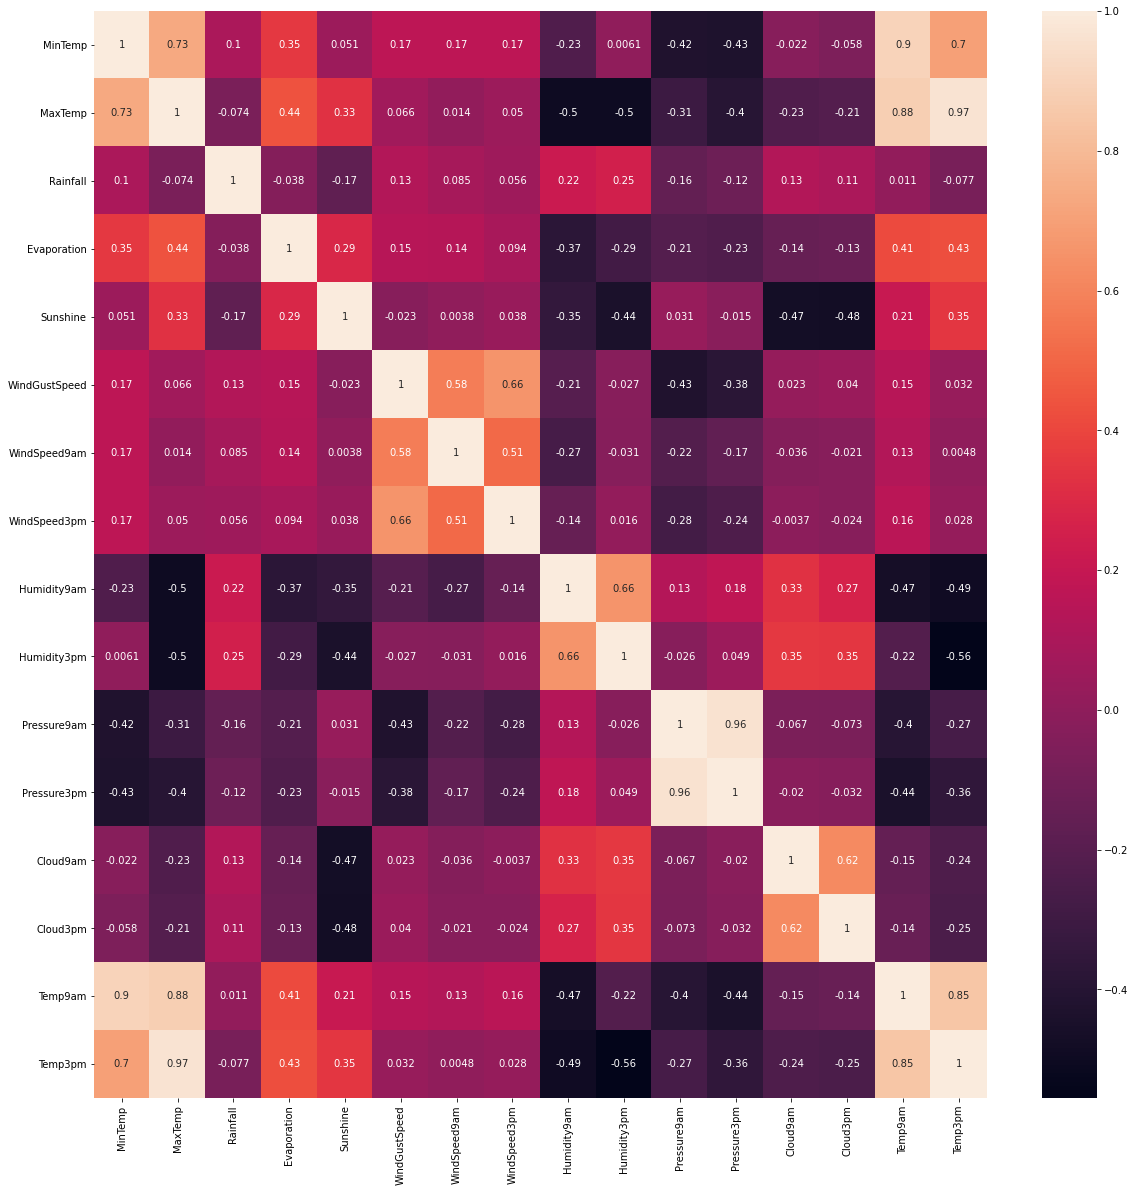

In [12]:
#Heatmap to check correlations
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

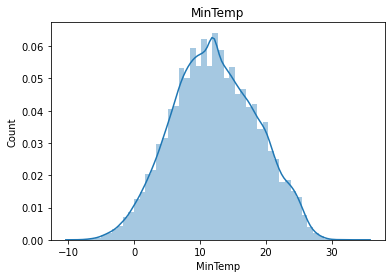

<Figure size 1080x1080 with 0 Axes>

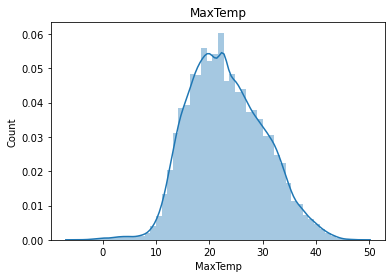

<Figure size 1080x1080 with 0 Axes>

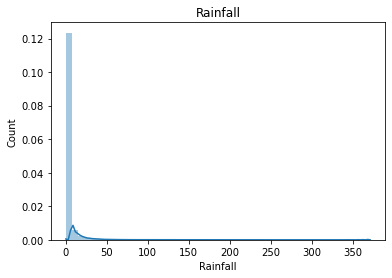

<Figure size 1080x1080 with 0 Axes>

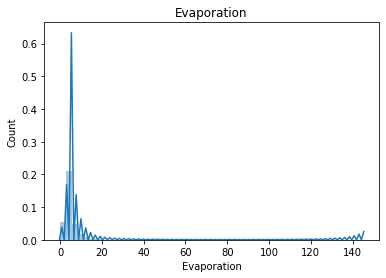

<Figure size 1080x1080 with 0 Axes>

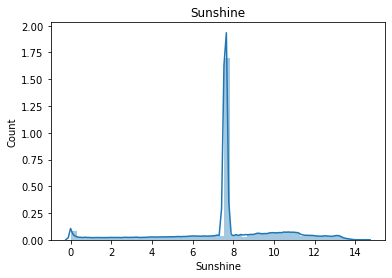

<Figure size 1080x1080 with 0 Axes>

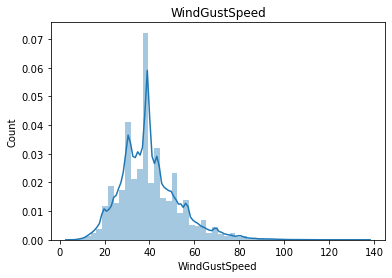

<Figure size 1080x1080 with 0 Axes>

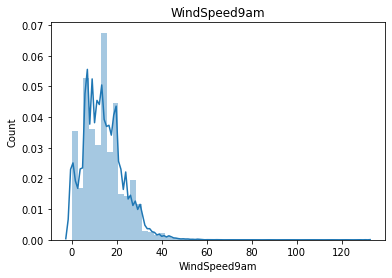

<Figure size 1080x1080 with 0 Axes>

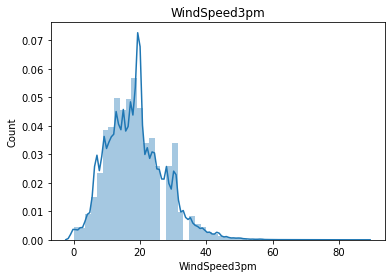

<Figure size 1080x1080 with 0 Axes>

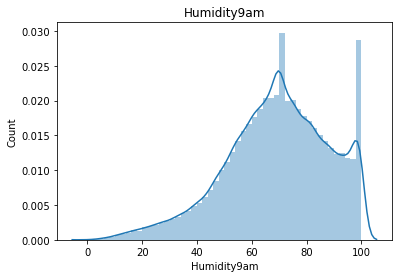

<Figure size 1080x1080 with 0 Axes>

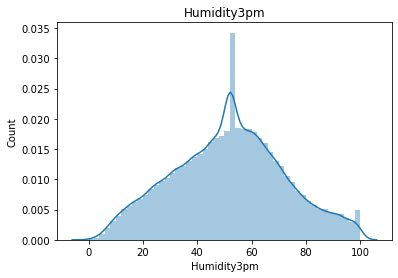

<Figure size 1080x1080 with 0 Axes>

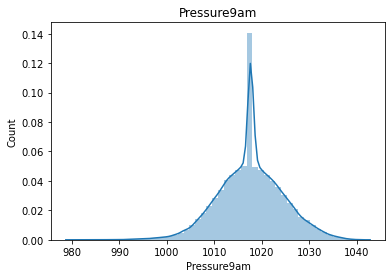

<Figure size 1080x1080 with 0 Axes>

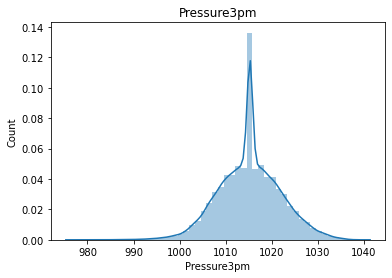

<Figure size 1080x1080 with 0 Axes>

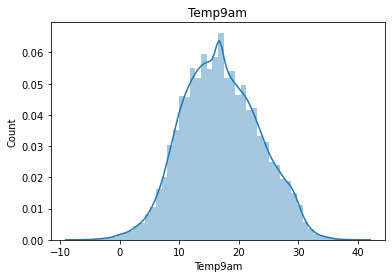

<Figure size 1080x1080 with 0 Axes>

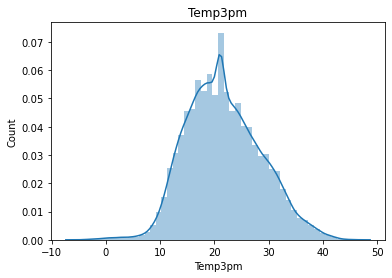

<Figure size 1080x1080 with 0 Axes>

In [13]:
#Plotting Histograms of each feature
for feature in continuous_feature:
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

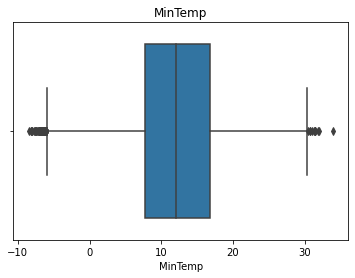

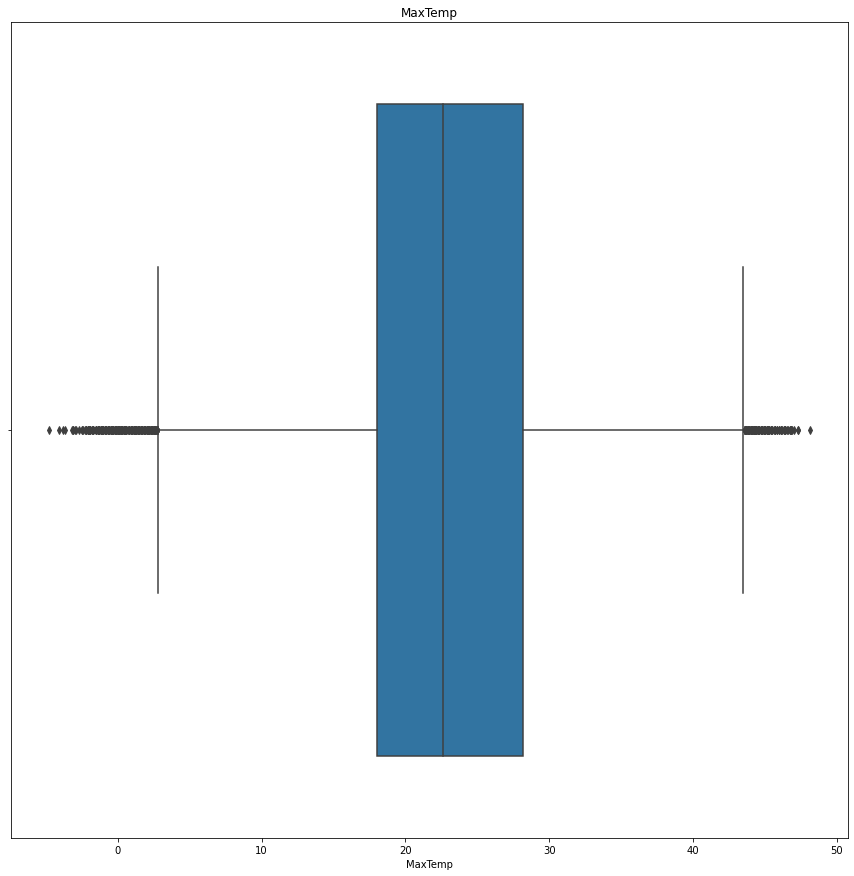

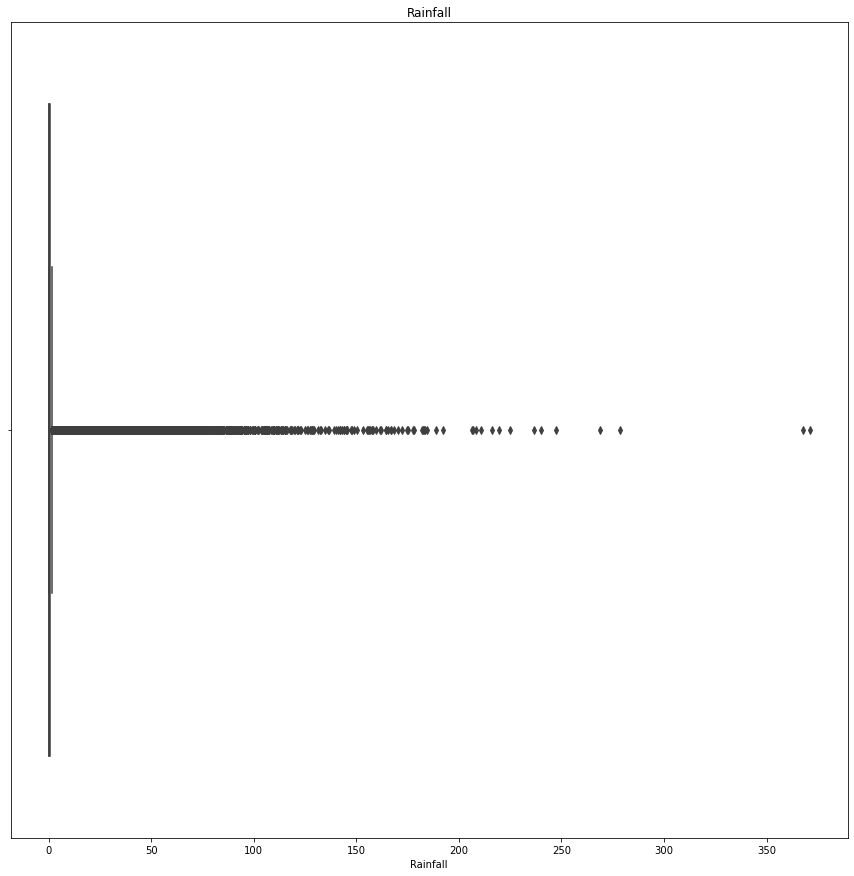

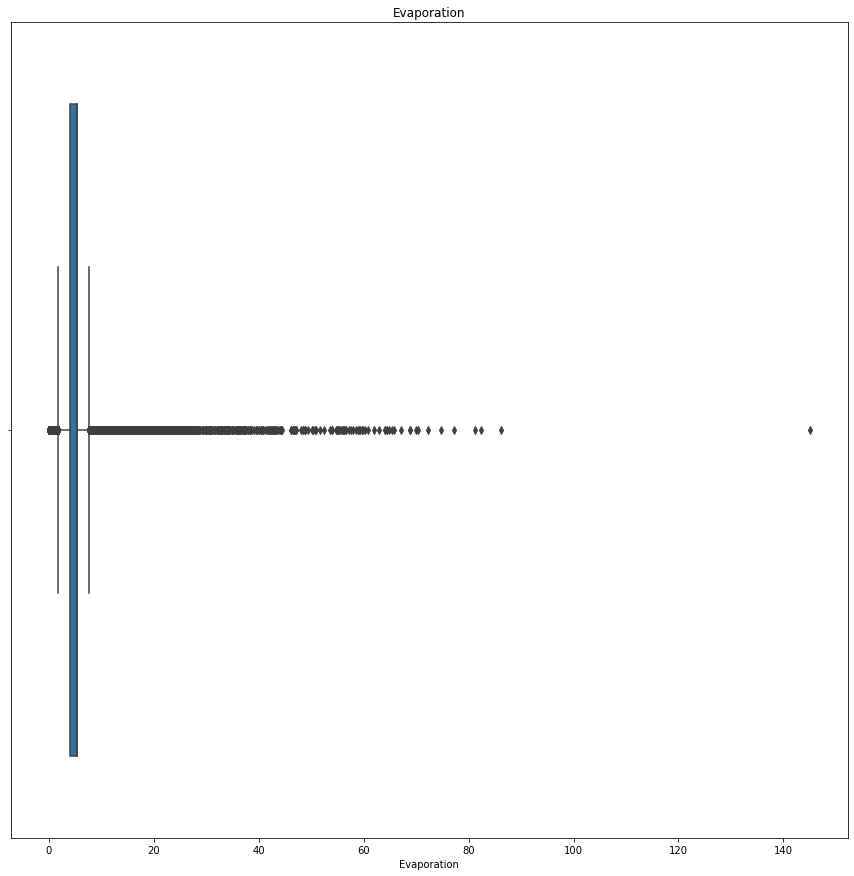

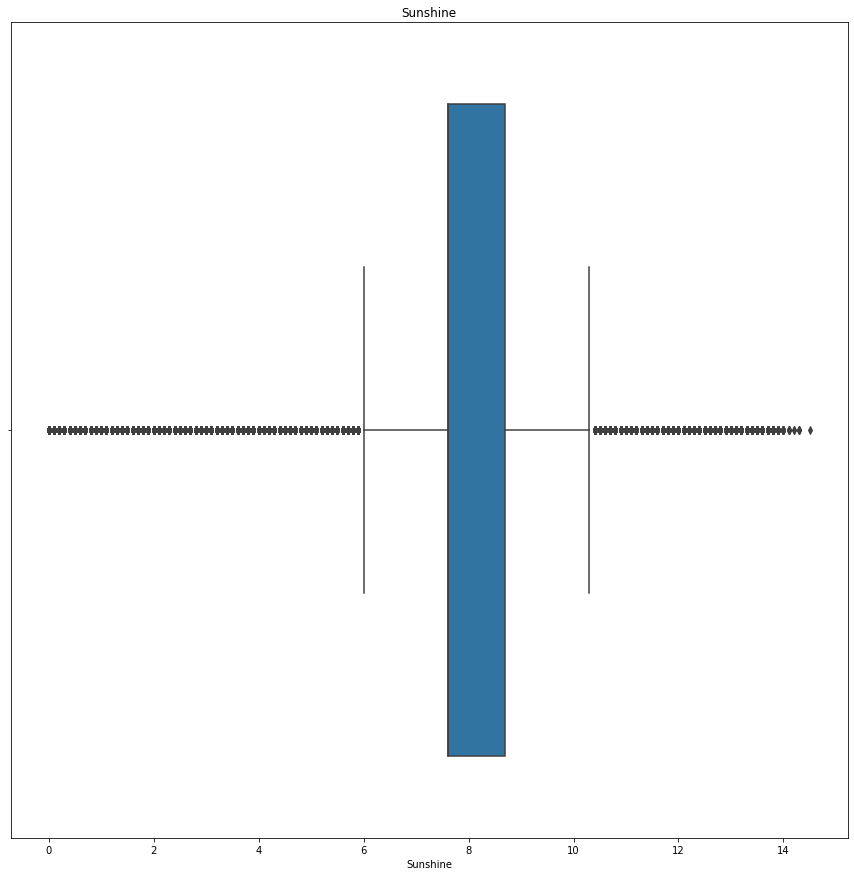

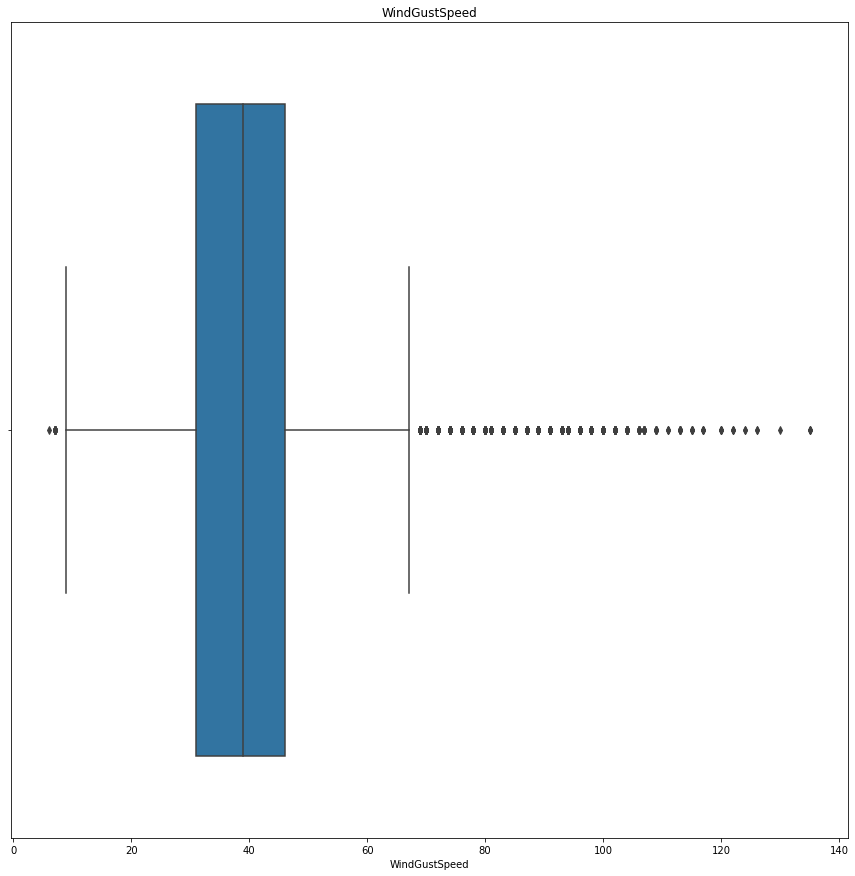

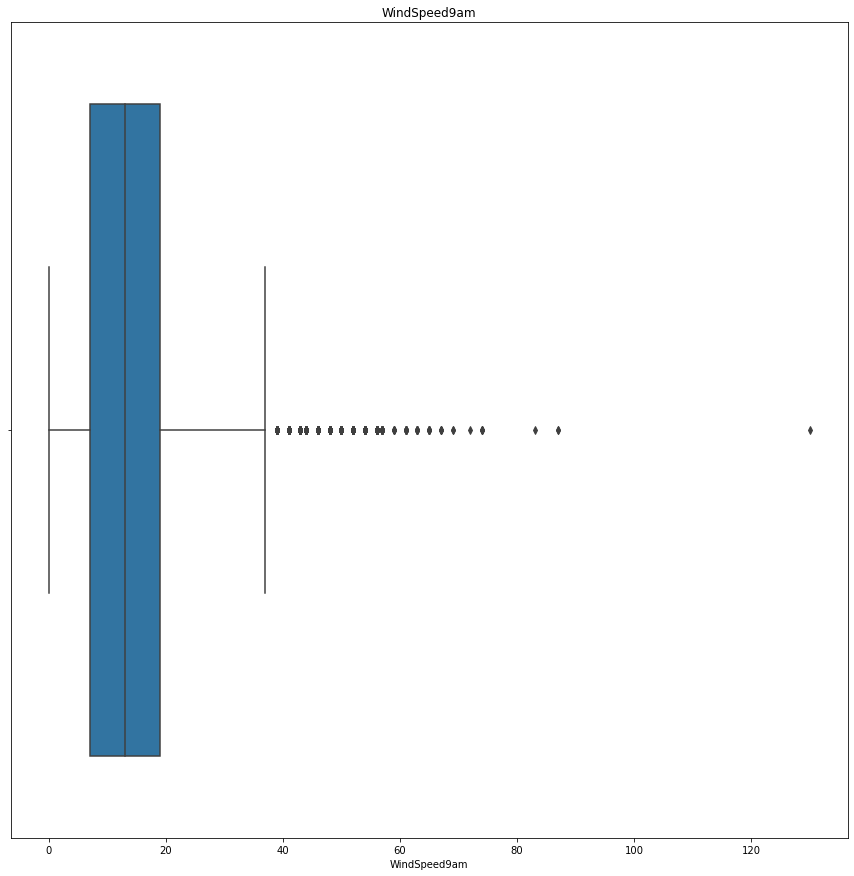

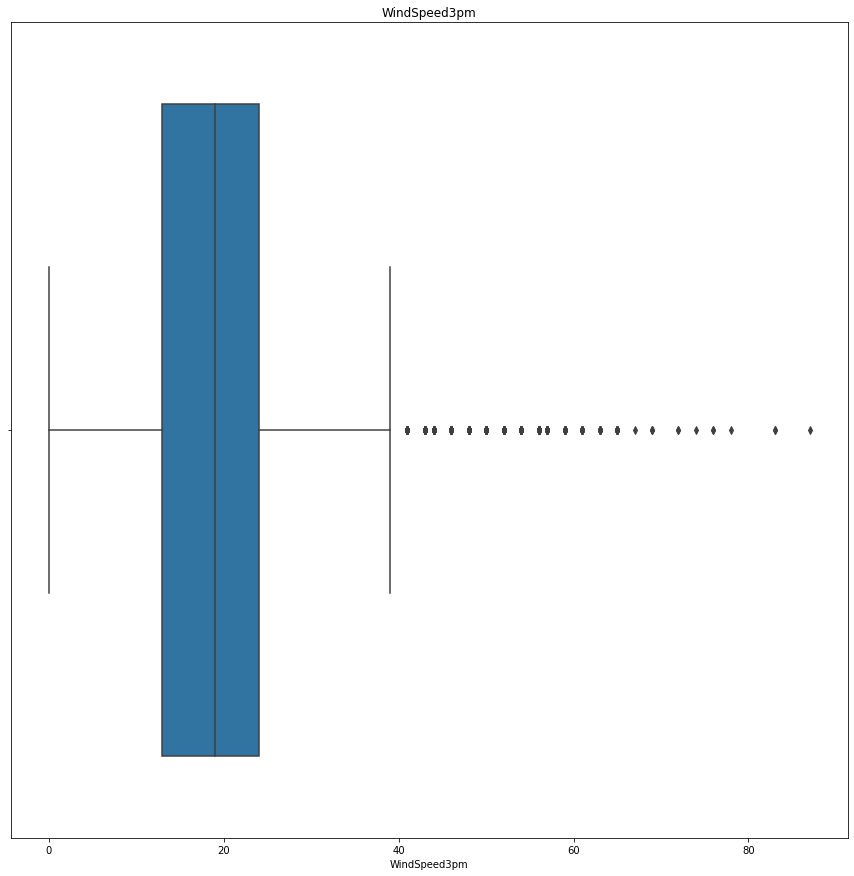

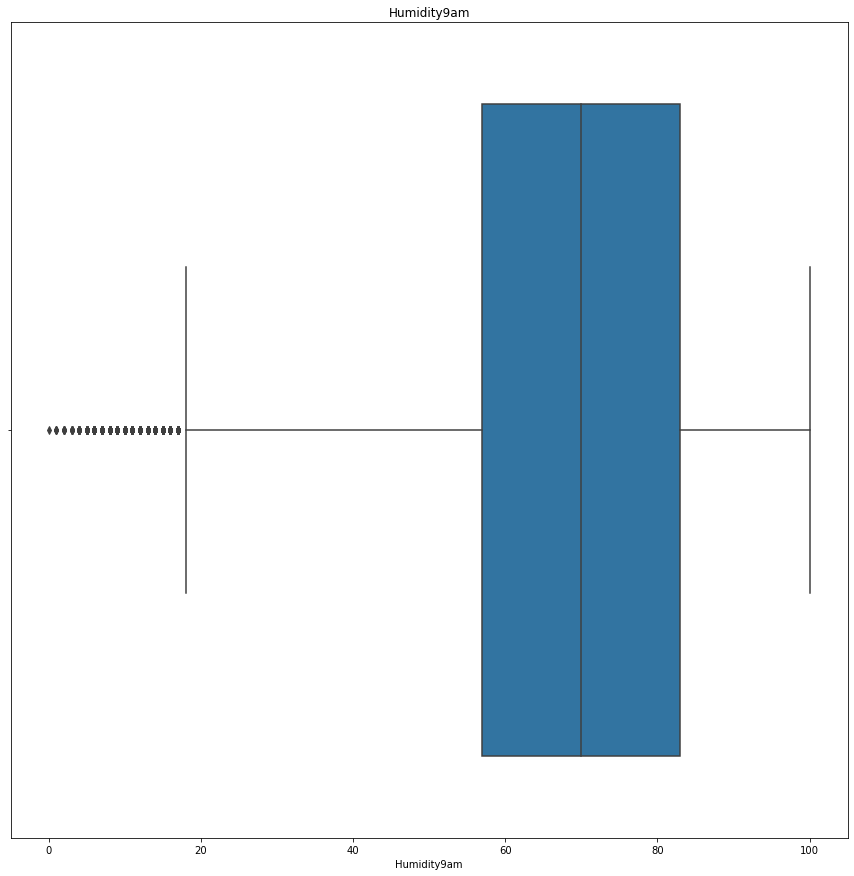

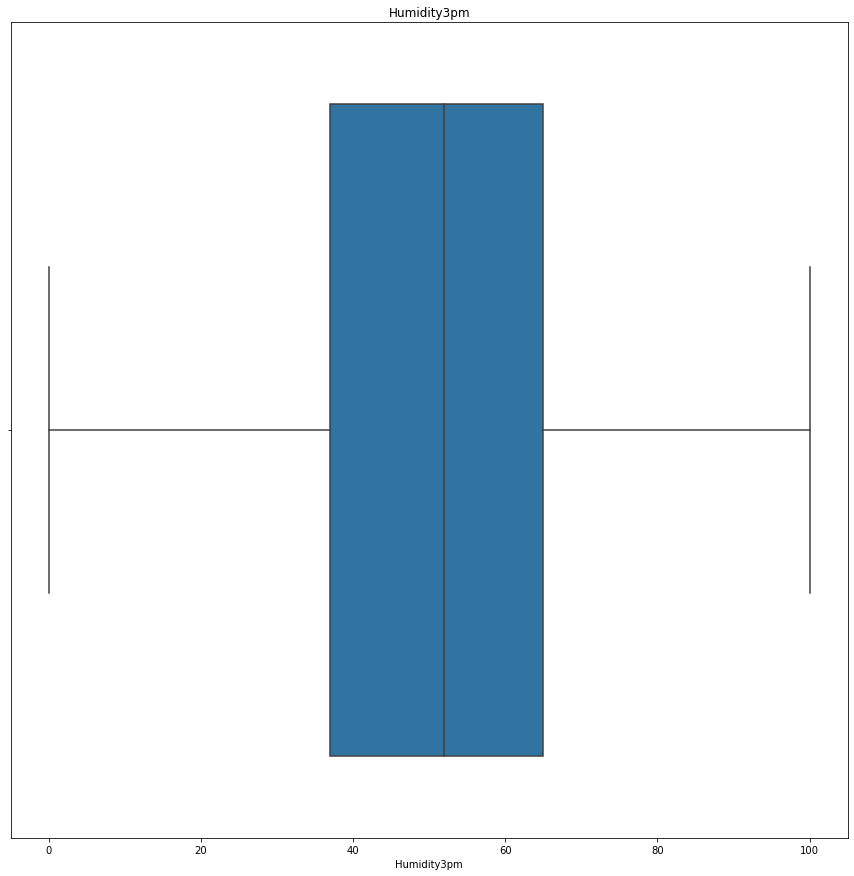

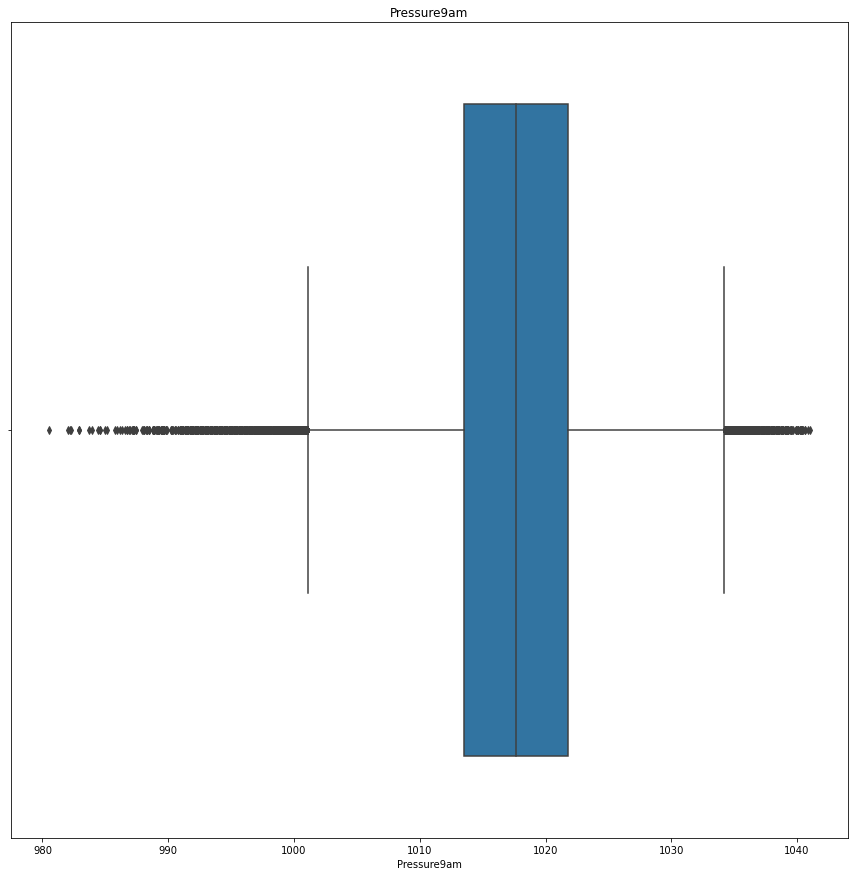

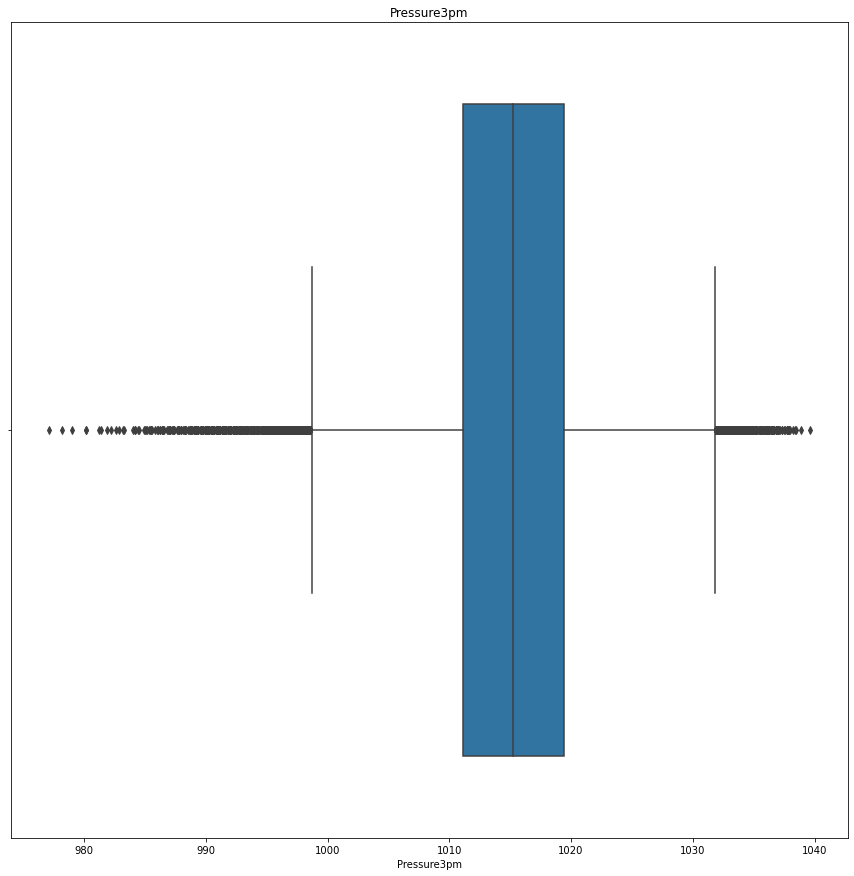

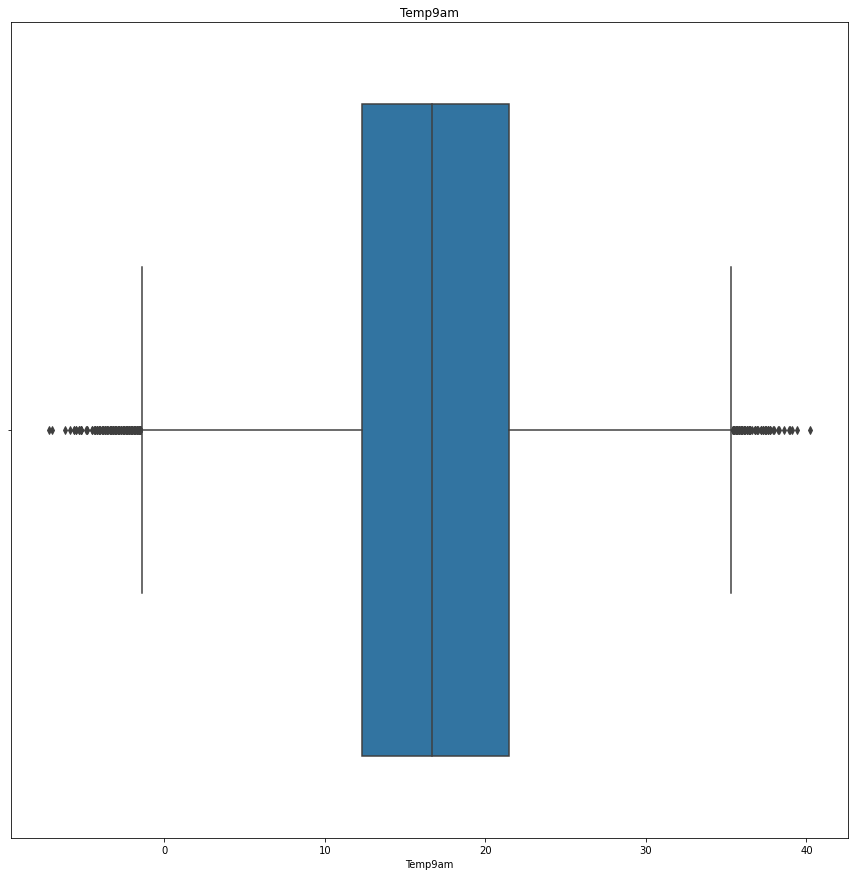

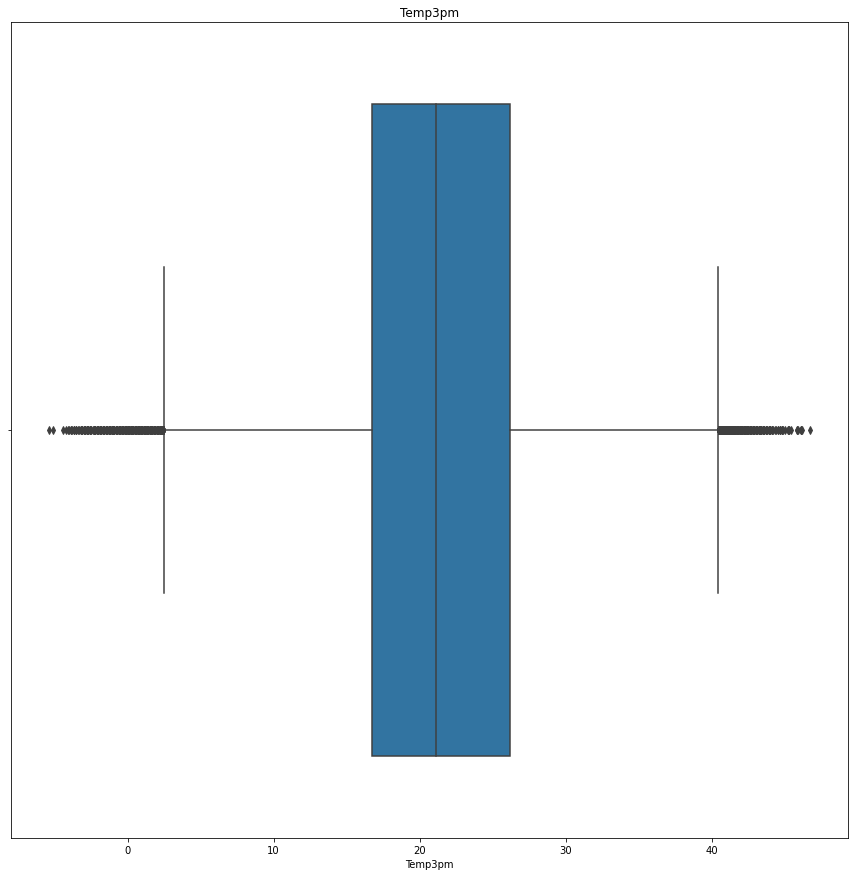

<Figure size 1080x1080 with 0 Axes>

In [14]:
#plotting box plots to check outliers
for feature in continuous_feature:
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [15]:
#Onehot encoding of dependent features
data["RainToday"] = pd.get_dummies(data["RainToday"], drop_first = True)
data["RainTomorrow"] = pd.get_dummies(data["RainTomorrow"], drop_first = True)

In [16]:
#Label Encoding of categorical features
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
data["WindGustDir"] = data["WindGustDir"].map(windgustdir)
data["WindDir9am"] = data["WindDir9am"].map(winddir9am)
data["WindDir3pm"] = data["WindDir3pm"].map(winddir3pm)

In [17]:
#Label Encoding of categorical features
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
data["Location"] = data["Location"].map(location)

In [18]:
#Filling Nan Values
data["WindGustDir"] = data["WindGustDir"].fillna(data["WindGustDir"].value_counts().index[0])
data["WindDir9am"] = data["WindDir9am"].fillna(data["WindDir9am"].value_counts().index[0])
data["WindDir3pm"] = data["WindDir3pm"].fillna(data["WindDir3pm"].value_counts().index[0])

In [19]:
#Converting date column to datetime data type
data["Date"] = pd.to_datetime(data["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [20]:
#Creating separate columns for month and day
data["Date_month"] = data["Date"].dt.month
data["Date_day"] = data["Date"].dt.day

In [21]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,5.468232,7.611178,4.0,44.0,5.0,...,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,5.468232,7.611178,2.0,44.0,0.0,...,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,5.468232,7.611178,5.0,46.0,5.0,...,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,5.468232,7.611178,11.0,24.0,13.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.468232,7.611178,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,5.468232,7.611178,15.0,31.0,13.0,...,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,5.468232,7.611178,0.0,22.0,13.0,...,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,5.468232,7.611178,3.0,37.0,13.0,...,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,5.468232,7.611178,12.0,28.0,11.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


In [22]:
#displaying continous features
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


In [23]:
#Removing Outliers using Interquartile Range
IQR=data.MinTemp.quantile(0.75)-data.MinTemp.quantile(0.25)
lower_bridge=data.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [24]:
#Removing Outliers using Interquartile Range
data.loc[data['MinTemp']>=30.45,'MinTemp']=30.45
data.loc[data['MinTemp']<=-5.95,'MinTemp']=-5.95

In [25]:
#Removing Outliers using Interquartile Range
IQR=data.MaxTemp.quantile(0.75)-data.MaxTemp.quantile(0.25)
lower_bridge=data.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=data.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['MaxTemp']>=43.5,'MaxTemp']=43.5
data.loc[data['MaxTemp']<=2.7,'MaxTemp']=2.7

2.700000000000001 43.5


In [26]:
#Removing Outliers using Interquartile Range
IQR=data.Rainfall.quantile(0.75)-data.Rainfall.quantile(0.25)
lower_bridge=data.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Rainfall']>=1.5,'Rainfall']=1.5
data.loc[data['Rainfall']<=-0.89,'Rainfall']=-0.89

-0.8999999999999999 1.5


In [27]:
#Removing Outliers using Interquartile Range
IQR=data.Evaporation.quantile(0.75)-data.Evaporation.quantile(0.25)
lower_bridge=data.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Evaporation']>=7,'Evaporation']=7.67
data.loc[data['Evaporation']<=1,'Evaporation']=1.79

1.7976527156163042 7.67057880730616


In [28]:
#Removing Outliers using Interquartile Range
IQR=data.WindGustSpeed.quantile(0.75)-data.WindGustSpeed.quantile(0.25)
lower_bridge=data.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
data.loc[data['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

8.5 68.5


In [29]:
#Removing Outliers using Interquartile Range
IQR=data.WindSpeed9am.quantile(0.75)-data.WindSpeed9am.quantile(0.25)
lower_bridge=data.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['WindSpeed9am']>=37,'WindSpeed9am']=37
data.loc[data['WindSpeed9am']<=-11,'WindSpeed9am']=-11

-11.0 37.0


In [30]:
#Removing Outliers using Interquartile Range
IQR=data.WindSpeed3pm.quantile(0.75)-data.WindSpeed3pm.quantile(0.25)
lower_bridge=data.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
data.loc[data['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

-3.5 40.5


In [31]:
#Removing Outliers using Interquartile Range
IQR=data.Humidity9am.quantile(0.75)-data.Humidity9am.quantile(0.25)
lower_bridge=data.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Humidity9am']>=122,'Humidity9am']=122
data.loc[data['Humidity9am']<=18,'Humidity9am']=18

18.0 122.0


In [32]:
#Removing Outliers using Interquartile Range
IQR=data.Pressure9am.quantile(0.75)-data.Pressure9am.quantile(0.25)
lower_bridge=data.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Pressure9am']>=1034.25,'Pressure9am']=1034.25
data.loc[data['Pressure9am']<=1001.05,'Pressure9am']=1001.05

1001.0500000000001 1034.25


In [33]:
#Removing Outliers using Interquartile Range
IQR=data.Pressure3pm.quantile(0.75)-data.Pressure3pm.quantile(0.25)
lower_bridge=data.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
data.loc[data['Pressure3pm']<=998.65,'Pressure3pm']=998.65

998.6500000000001 1031.85


In [34]:
#Removing Outliers using Interquartile Range
IQR=data.Temp9am.quantile(0.75)-data.Temp9am.quantile(0.25)
lower_bridge=data.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Temp9am']>=35.3,'Temp9am']=35.3
data.loc[data['Temp9am']<=-1.49,'Temp9am']=-1.49

-1.4999999999999982 35.3


In [35]:
#Removing Outliers using Interquartile Range
IQR=data.Temp3pm.quantile(0.75)-data.Temp3pm.quantile(0.25)
lower_bridge=data.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Temp3pm']>=40.45,'Temp3pm']=40.45
data.loc[data['Temp3pm']<=2.45,'Temp3pm']=2.45

2.4499999999999993 40.45


In [36]:
#Removing Outliers using Interquartile Range
IQR=data.Sunshine.quantile(0.75)-data.Sunshine.quantile(0.25)
lower_bridge=data.Sunshine.quantile(0.25)-(IQR*1.5)
upper_bridge=data.Sunshine.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)
data.loc[data['Sunshine']>=10,'Sunshine']=10.33
data.loc[data['Sunshine']<=6,'Sunshine']=5.99

5.977943801652863 10.33323371900828


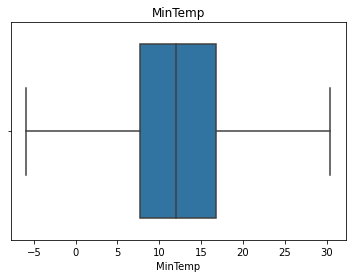

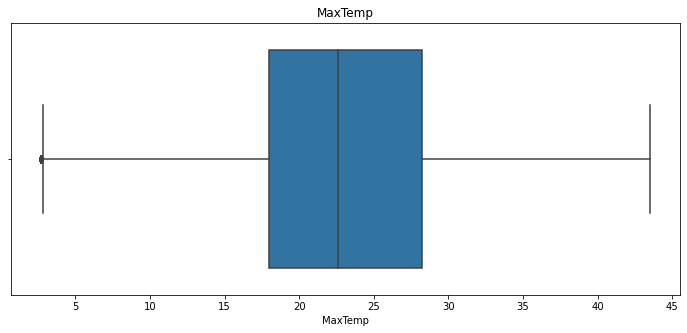

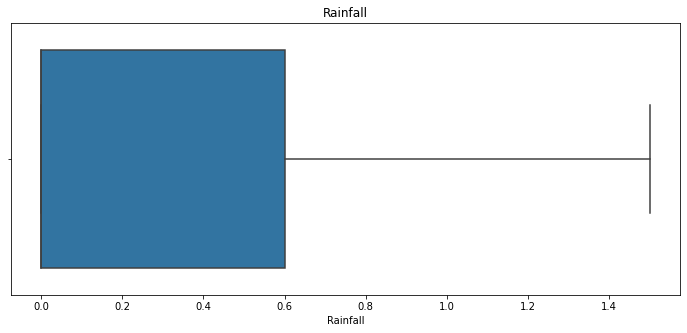

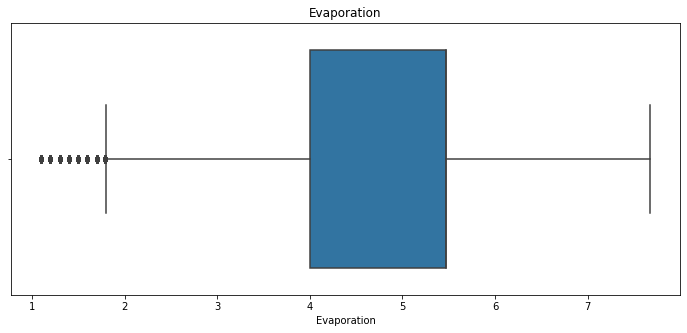

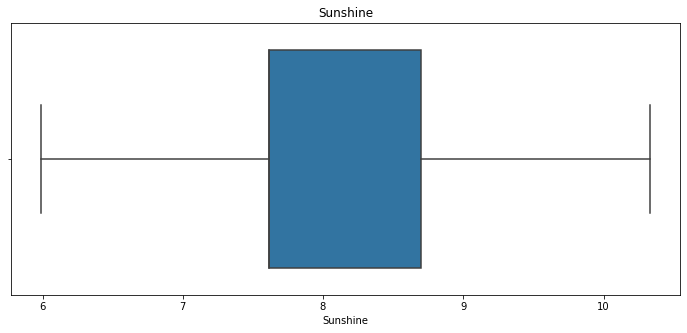

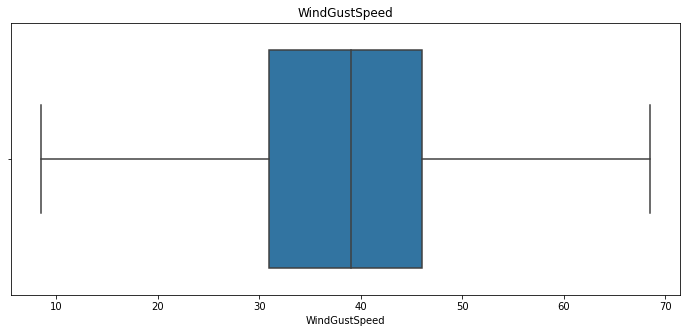

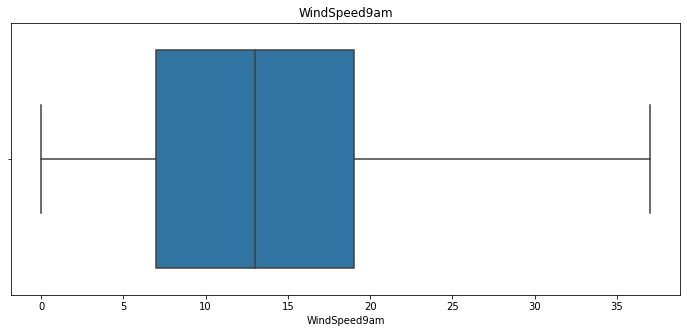

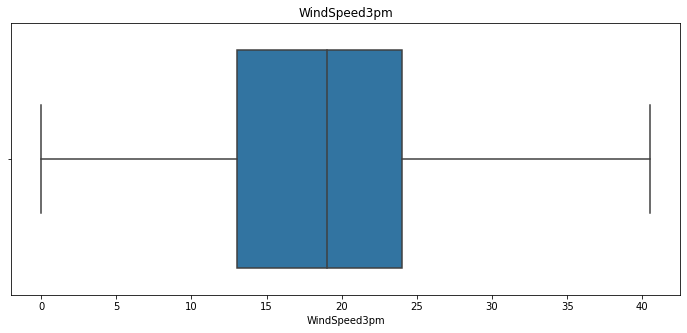

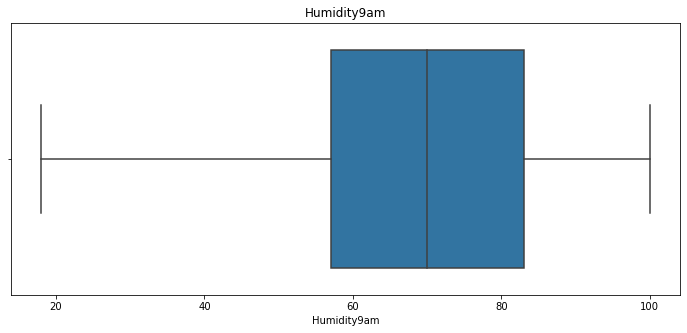

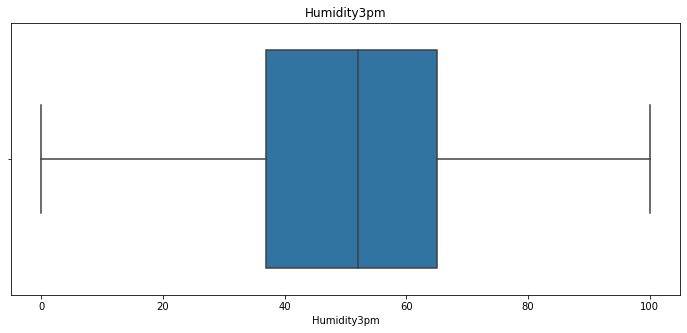

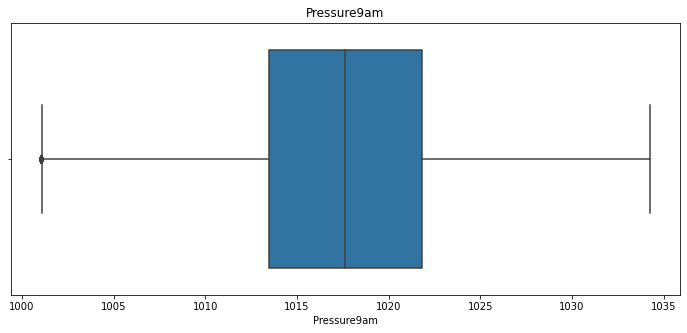

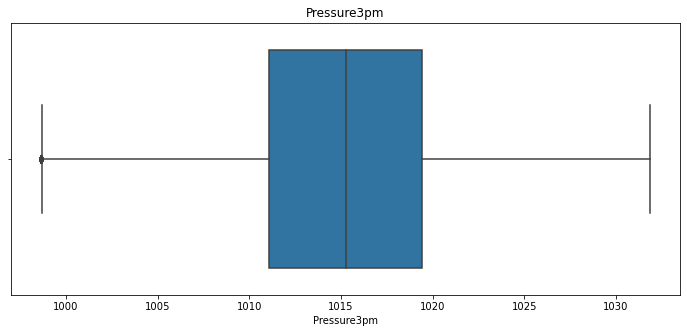

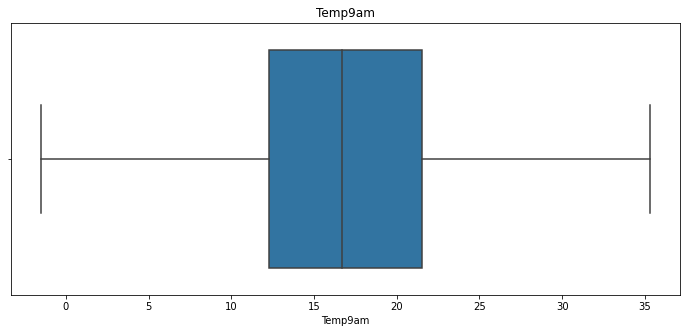

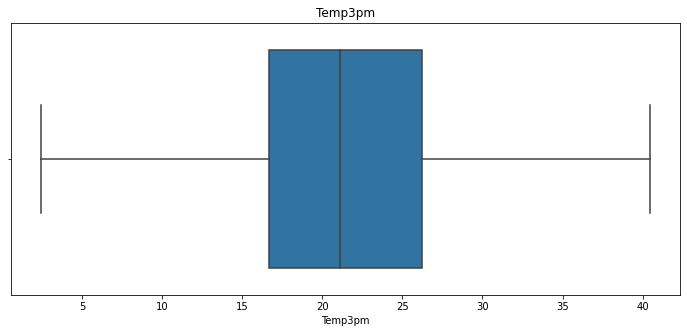

<Figure size 864x360 with 0 Axes>

In [37]:
#Removing Outliers using Interquartile Range
for feature in continuous_feature:
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(12,5))

In [38]:
#Saving dataset to file
data.to_csv("preprocessed_1.csv", index=False)

In [39]:
#Separating independent and target columns
X = data.drop(["RainTomorrow", "Date"], axis=1)
Y = data["RainTomorrow"]

In [40]:
X.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Date_month       0
Date_day         0
dtype: int64

In [41]:
#Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [42]:
#Fixing the imbalancing of dataset
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [43]:
#Fitting Random Forest Model
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20645  2072]
 [ 2388  3987]]
0.8466932490031623
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     22717
           1       0.66      0.63      0.64      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.77      0.77     29092
weighted avg       0.84      0.85      0.85     29092



0.7671012690677362

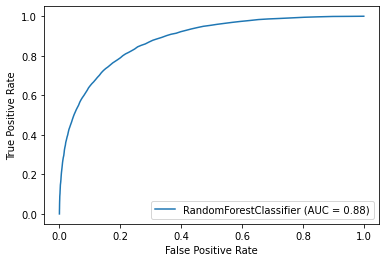

In [44]:
#Plotting AUC curve
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [45]:
#Fitting XgBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[21380  1337]
 [ 2797  3578]]
0.8578990787845456
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.73      0.56      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



In [151]:
#dumping models in pickle file
joblib.dump(xgb, "xgb.pkl")
joblib.dump(rf, "rf.pkl")

['rf.pkl']